In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
    
    
%matplotlib inline

In [163]:
covid_data = pd.read_csv('covid_data.csv')

In [164]:
covid_data.head(20)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
5,Afghanistan,2020-01-05,0,0,38928341.0,2.581,1803.987,0.5
6,Afghanistan,2020-01-06,0,0,38928341.0,2.581,1803.987,0.5
7,Afghanistan,2020-01-07,0,0,38928341.0,2.581,1803.987,0.5
8,Afghanistan,2020-01-08,0,0,38928341.0,2.581,1803.987,0.5
9,Afghanistan,2020-01-09,0,0,38928341.0,2.581,1803.987,0.5


In [165]:
covid_data.shape

(23082, 8)

In [166]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [167]:
covid_data.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [168]:
# assert that there are no duplicated rows in the dataframe
assert(covid_data.duplicated().sum() == 0 )


In [169]:
# dataframe name (covid_data) is hardcoded in the function:
    # Takes column name as param 
    # returns unique in indicated column
    
def entries(columnName):
    #param: name of column
    global covid_data
    df = covid_data
    return df[columnName].unique()

In [170]:
entries('location')

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [171]:
#investigate
covid_data.location.isnull().sum().any()

False

In [172]:
#Countries without population figures
countries_no_population_figures = covid_data[covid_data['population'].isnull()]

In [173]:
countries_no_population_figures.sample(10)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
23057,International,2020-02-08,3,0,NaN,NaN,NaN,NaN
23059,International,2020-02-10,6,0,NaN,NaN,NaN,NaN
23030,International,2020-01-12,0,0,NaN,NaN,NaN,NaN
23073,International,2020-02-24,57,1,NaN,NaN,NaN,NaN
23061,International,2020-02-12,39,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN
23066,International,2020-02-17,0,0,NaN,NaN,NaN,NaN
23038,International,2020-01-20,0,0,NaN,NaN,NaN,NaN
23040,International,2020-01-22,0,0,NaN,NaN,NaN,NaN
23065,International,2020-02-16,134,0,NaN,NaN,NaN,NaN


In [174]:
covid_data.groupby('location')['location'].nunique()

location
Afghanistan       1
Albania           1
Algeria           1
Andorra           1
Angola            1
                 ..
Western Sahara    1
World             1
Yemen             1
Zambia            1
Zimbabwe          1
Name: location, Length: 212, dtype: int64

In [175]:
covid_data.location.value_counts()['International']

64

In [176]:
covid_data.location.value_counts()


Germany           163
Japan             163
Czech Republic    163
United States     163
Brazil            163
                 ... 
Yemen              62
Western Sahara     46
Tajikistan         41
Comoros            40
Lesotho            27
Name: location, Length: 212, dtype: int64

## Cleaning Data

In [177]:
clean_df = covid_data.copy()

In [178]:
#confirm that the df has been copied 
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [179]:
# Convert date to datetime object
clean_df.date.info

<bound method Series.info of 0        2019-12-31
1        2020-01-01
2        2020-01-02
3        2020-01-03
4        2020-01-04
            ...    
23077    2020-02-28
23078    2020-02-29
23079    2020-03-01
23080    2020-03-02
23081    2020-03-10
Name: date, Length: 23082, dtype: object>

In [180]:
#Check for null values
clean_df.date.isnull().values.any()

False

In [181]:
clean_df.date = pd.to_datetime(clean_df.date)

In [182]:
#Conversion
clean_df.date.info

<bound method Series.info of 0       2019-12-31
1       2020-01-01
2       2020-01-02
3       2020-01-03
4       2020-01-04
           ...    
23077   2020-02-28
23078   2020-02-29
23079   2020-03-01
23080   2020-03-02
23081   2020-03-10
Name: date, Length: 23082, dtype: datetime64[ns]>

In [183]:
assert clean_df['date'].dtype == 'datetime64[ns]'

In [184]:
clean_df['date'].info

<bound method Series.info of 0       2019-12-31
1       2020-01-01
2       2020-01-02
3       2020-01-03
4       2020-01-04
           ...    
23077   2020-02-28
23078   2020-02-29
23079   2020-03-01
23080   2020-03-02
23081   2020-03-10
Name: date, Length: 23082, dtype: datetime64[ns]>

##### remove negative entries in new_cases and new_deaths counts 

In [185]:
clean_df[clean_df['new_cases'] < 0]

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
2446,Benin,2020-05-20,-209,0,12123198.0,3.244,2064.236,0.50
6237,Ecuador,2020-05-07,-2461,49,17643060.0,7.104,10581.936,1.50
6239,Ecuador,2020-05-09,-1480,50,17643060.0,7.104,10581.936,1.50
6242,Ecuador,2020-05-12,-50,18,17643060.0,7.104,10581.936,1.50
7488,France,2020-06-03,-766,107,65273512.0,19.718,38605.671,5.98
12538,Lithuania,2020-04-29,-105,3,2722291.0,19.002,29524.265,6.56
16899,Portugal,2020-05-03,-161,16,10196707.0,21.502,27936.896,3.39
17959,San Marino,2020-05-11,-9,0,33938.0,NaN,56861.470,3.80
19498,Spain,2020-04-19,-713,410,46754783.0,19.436,34272.360,2.97
19534,Spain,2020-05-25,-372,-1918,46754783.0,19.436,34272.360,2.97


We have 14 rows with a negative number in the new_cases probably as a result of data entry error

In [186]:
clean_df[clean_df['new_cases'] < 0]


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
2446,Benin,2020-05-20,-209,0,12123198.0,3.244,2064.236,0.50
6237,Ecuador,2020-05-07,-2461,49,17643060.0,7.104,10581.936,1.50
6239,Ecuador,2020-05-09,-1480,50,17643060.0,7.104,10581.936,1.50
6242,Ecuador,2020-05-12,-50,18,17643060.0,7.104,10581.936,1.50
7488,France,2020-06-03,-766,107,65273512.0,19.718,38605.671,5.98
12538,Lithuania,2020-04-29,-105,3,2722291.0,19.002,29524.265,6.56
16899,Portugal,2020-05-03,-161,16,10196707.0,21.502,27936.896,3.39
17959,San Marino,2020-05-11,-9,0,33938.0,NaN,56861.470,3.80
19498,Spain,2020-04-19,-713,410,46754783.0,19.436,34272.360,2.97
19534,Spain,2020-05-25,-372,-1918,46754783.0,19.436,34272.360,2.97


In [187]:
clean_df[clean_df['new_cases'] < 0].new_cases.map(lambda x: 0)

2446     0
6237     0
6239     0
6242     0
7488     0
12538    0
16899    0
17959    0
19498    0
19534    0
21396    0
21408    0
21805    0
23081    0
Name: new_cases, dtype: int64

In [188]:
clean_df.iloc[: 3]

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5


## Univariate Exploration

In [189]:
#The total Number of deaths over the years
total_overall_deaths = clean_df['new_deaths'].sum()

In [190]:
print(total_overall_deaths)

822390


In [191]:
#Period under review earliest date
clean_df.date.max()

Timestamp('2020-06-10 00:00:00')

In [192]:
#Period latest date
clean_df.date.min()

Timestamp('2019-12-31 00:00:00')

In [193]:
#add year column
clean_df['year'] = clean_df['date'].dt.year

In [194]:
#add month column
clean_df['month'] = clean_df['date'].dt.strftime('%b')

In [195]:
clean_df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,2019,Dec
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan


In [196]:
#Let's examine December 2019 figures 
clean_df_2019 = clean_df[clean_df['year'] == 2019]

In [197]:
clean_df_2019[clean_df_2019['new_cases'] != 0]

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month
4387,China,2019-12-31,27,0,1.439324e+09,10.641,15308.712,4.340,2019,Dec
22855,World,2019-12-31,27,0,7.794799e+09,8.696,15469.207,2.705,2019,Dec


China is the only country in the world with new recorded cases in 2019, with a total of 27 cases. 

In [198]:
#Total number of deaths per country 
deaths_per_country = clean_df['new_deaths'].groupby(clean_df['location']).sum()

In [199]:
#Top 40 Overall deaths per country
deaths_per_country.sort_values(ascending=False).head(40)



location
World             411195
United States     112006
United Kingdom     40883
Brazil             38406
Italy              34043
France             29296
Spain              27136
Mexico             14649
Belgium             9619
Germany             8729
Iran                8425
Canada              7897
India               7745
Russia              6141
Netherlands         6031
Peru                5738
Turkey              4729
Sweden              4717
China               4638
Ecuador             3690
Chile               2283
Pakistan            2255
Indonesia           1923
Ireland             1691
Switzerland         1662
Portugal            1492
Colombia            1372
Romania             1345
Egypt               1306
Poland              1183
South Africa        1162
Philippines         1017
Bangladesh           975
Japan                919
Ukraine              810
Saudi Arabia         783
Algeria              724
Argentina            717
Austria              672
Denmark         

In [200]:
clean_df[clean_df['location'] == 'Chad'].aged_65_older_percent

4206    2.486
4207    2.486
4208    2.486
4209    2.486
4210    2.486
        ...  
4284    2.486
4285    2.486
4286    2.486
4287    2.486
4288    2.486
Name: aged_65_older_percent, Length: 83, dtype: float64

Country with the highest percent of aged over 65

In [208]:
aged_65_older_per_country = clean_df[['location', 'aged_65_older_percent']].drop_duplicates()


In [211]:
## avergares in a descending order
aged_65_older_per_country.sort_values('aged_65_older_percent', ascending=False)

,location,aged_65_older_percent
10941,Japan,27.049
10688,Italy,23.021
16836,Portugal,21.502
7914,Germany,21.453
7170,Finland,21.228
...,...,...
20370,Taiwan,NaN
21258,Turks and Caicos Islands,NaN
22242,Vatican,NaN
22581,Western Sahara,NaN


In [212]:
aged_65_older_per_country.sort_values('aged_65_older_percent', ascending=False).iloc[: 50]

,location,aged_65_older_percent
10941,Japan,27.049
10688,Italy,23.021
16836,Portugal,21.502
7914,Germany,21.453
7170,Finland,21.228
3293,Bulgaria,20.801
8249,Greece,20.396
19964,Sweden,19.985
11873,Latvia,19.754
4959,Croatia,19.724


Coeeficient between news deaths and age "aged_65_older_percent"

In [214]:
clean_df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,2019,Dec
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,2020,Jan


In [216]:
clean_df['new_deaths'].corr(clean_df['aged_65_older_percent'])

0.03849458482284256

In [219]:
clean_df.corr()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year
new_cases,1.000000,0.918490,0.659213,0.017650,0.011510,-0.012415,0.006148
new_deaths,0.918490,1.000000,0.624136,0.038495,0.017184,-0.012647,0.005851
population,0.659213,0.624136,1.000000,-0.022974,-0.052764,-0.029950,-0.008038
aged_65_older_percent,0.017650,0.038495,-0.022974,1.000000,0.461649,0.648919,-0.020213
gdp_per_capita,0.011510,0.017184,-0.052764,0.461649,1.000000,0.255495,-0.024224
hospital_beds_per_thousand,-0.012415,-0.012647,-0.029950,0.648919,0.255495,1.000000,-0.011281
year,0.006148,0.005851,-0.008038,-0.020213,-0.024224,-0.011281,1.000000


<AxesSubplot:>

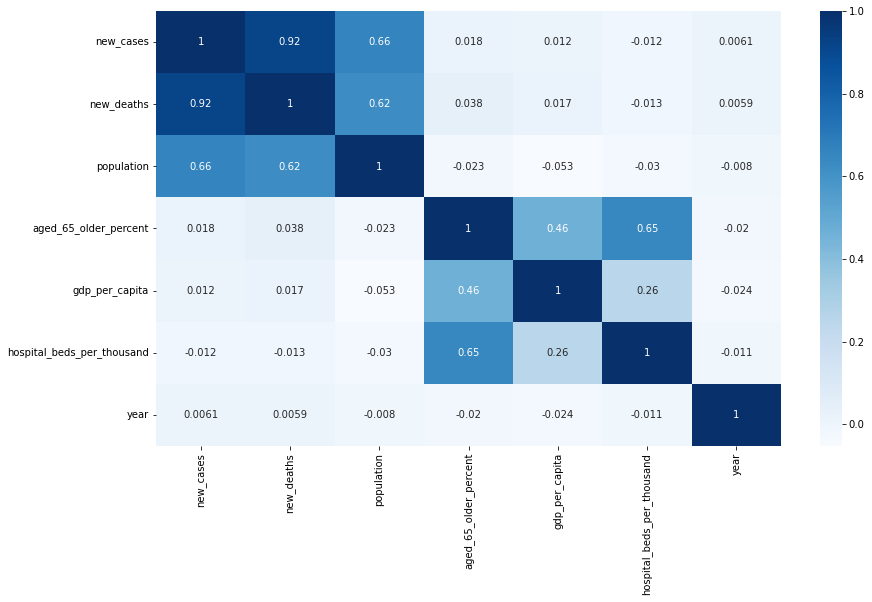

In [225]:
plt.figure(figsize=(14, 8))
sb.heatmap(clean_df.corr(), annot=True, cmap='Blues')

In [ ]:


#Function to assist with plotting loan_clean barcharts 

def horizontal_bar(colname):
    output_bar = sb.countplot(x=clean_df[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar



In [ ]:

sums = clean_df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top20 = sums.head(15)



In [ ]:
print(type(top20))

In [ ]:
print(top20)

In [ ]:
top20.plot(kind='bar')

In [ ]:
delete_index = 0
new_top20 = top20.drop('World')

In [ ]:
new_top20.plot(kind='bar')

In [ ]:
least_deaths = clean_df.groupby('location').new_deaths.sum().sort_values(ascending=True)
last20 = least_deaths.head(15)

In [ ]:
least_deaths.head(50)

In [ ]:
clean_df[clean_df['location'] == 'Afghanistan']

In [ ]:
clean_df[clean_df['location'] == 'Afghanistan'].groupby('month').new_cases.sum().sort_values(ascending=True)
